In [1]:
%load_ext autoreload
%autoreload 2

In [18]:
from distgen.physical_constants import unit_registry
import numpy as np
from matplotlib import pyplot as plt

# Random Number Generation
-----

To sample various distributions requires generating random numbers and supplying them to the $CDF^{-1}$ functions for each corresponding distribution.  Currently, this is handled using 

distgen.dist.random_generator(shape, sequence, \*\*params).  

Here shape = (n_dimension, n_particle) determines the shape of the random numbers returned.  The keyword 'sequence' can be used to set the sequence to Hammerlsey for quasi-random numbers. 

The difference is shown below:

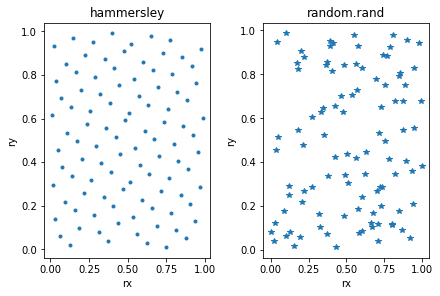

In [33]:
from distgen.dist import random_generator

shape = (2,100)

p1 = random_generator(shape,sequence='hammersley')
p2 = random_generator(shape)

fig, ax = plt.subplots(1, 2, constrained_layout=True)

ax[0].plot(p1[0,:],p1[1,:],'.');
ax[0].set(xlabel='rx', ylabel='ry', title='hammersley');

ax[1].plot(p2[0,:],p2[1,:],'*');
ax[1].set(xlabel='rx', ylabel='ry', title='random.rand');

# 1D Distributions
------

Distgen supports several one dimensional distribution types.

# Uniform 1D 

The uniform distirbuition is defined by a probability distribution function:

$\rho(x) = \frac{1}{b-a}$ for $a\leq x\leq b$ and zero elsewhere.  

The corresponding CDF is

$P(x) = \frac{x-a}{b-a}$ for $a\leq x\leq b$ and zero elsewhere.

The first and second moments of this distribution are:

$\langle x \rangle = \frac{1}{2}(a+b)$ and $\sigma_x = \frac{b-a}{\sqrt{12}}$

uniform
      min_x = 2.000 mm, max_x = 4.000 mm


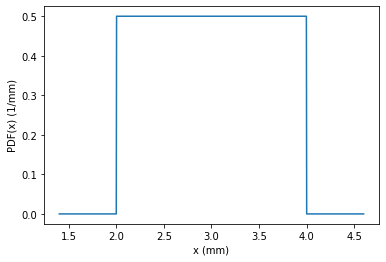

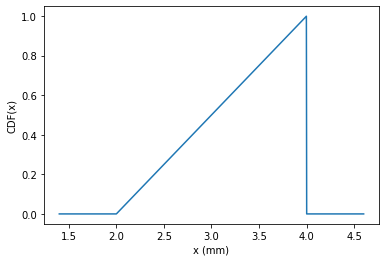

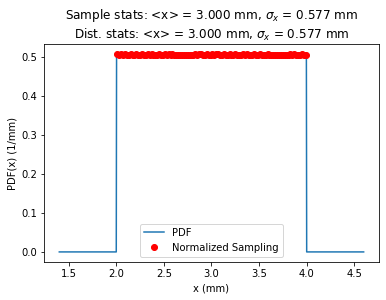

In [3]:
from distgen.dist import Uniform
var = 'x'
verbose=1
params={'min_x':2*unit_registry('mm'),'max_x':4*unit_registry('mm')}
uniform = Uniform(var,verbose=verbose,**params)
uniform.plot_pdf()
uniform.plot_cdf()
uniform.test_sampling()

# Normal Distribution (including truncation)

The general form of a normal distribution PDF with truncation is given by

$\rho(x) = \frac{1}{\sigma}\frac{\phi\left(\frac{x-\mu}{\sigma}\right)}{\Phi\left(\frac{b-\mu}{\sigma}\right)-\Phi\left(\frac{a-\mu}{\sigma}\right)}$.

In this expression $\phi(\xi) = \frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}\xi^2}$ is the canonical normal distribution, $\Phi(\xi) = \frac{1}{2}\left[1 + erf\left(\frac{\xi}{\sqrt{2}}\right) \right]$ is the canonical normal CDF, and $a=-N_{cutoff}\cdot\sigma$ and $b=-N_{cutoff}\cdot\sigma$ are the left and right truncation points.  The CDF if given by

$P(x) = \frac{\Phi\left(\frac{x-\mu}{\sigma}\right) - \Phi\left(\frac{a-\mu}{\sigma}\right)}{\Phi\left(\frac{b-\mu}{\sigma}\right)-\Phi\left(\frac{a-\mu}{\sigma}\right)}$.

Defining $\alpha = \frac{a-\mu}{\sigma}$ and $\beta = \frac{b-\mu}{\sigma}$, the first and second moments of the distribution are:

$\langle x\rangle = \mu + \frac{\phi\left(\alpha\right) - \phi\left(\beta\right)}{\Phi\left(\beta\right)-\Phi\left(\alpha\right)}\sigma$ and $\sigma_x = \sigma \left\{1 + \frac{\alpha\phi\left(\alpha\right) - \beta\phi(\beta) }{\Phi(\beta) - \Phi(\alpha)} - \left(\frac{\phi\left(\alpha\right) - \phi(\beta)}{\Phi(\beta) - \Phi(\alpha)}\right)^{2} \right\}^{1/2} $.

When using this distribution, if the $N_{cutoff}$ is not set then the distribution reduces to an infinite range normal distribution, as first shown below:

Gaussian
      avg_x = -1.000 mm, sigma_x = 2.000 mm


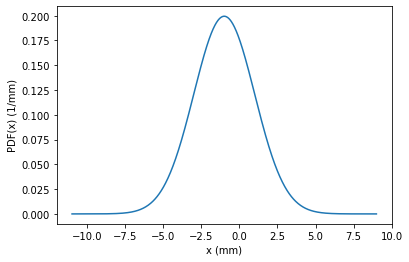

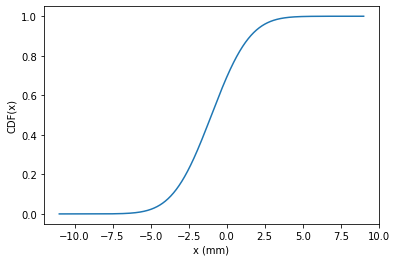

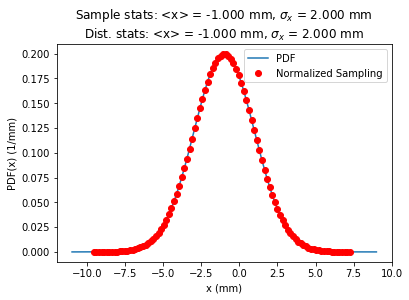

In [4]:
from distgen.dist import Norm
var = 'x'
verbose=1
params={'sigma_x':2*unit_registry('mm'),'avg_x':-1*unit_registry('mm')}
norm = Norm(var,verbose=verbose,**params)
norm.plot_pdf()
norm.plot_cdf()
norm.test_sampling()

Below the $N_{cutoff}$ parameter is set to cut the distribution symmetrically:

Gaussian
      avg_x = 0.000 mm, sigma_x = 2.000 mm
      Left n_sigma_cutoff = 2.000, Right n_sigma_cutoff = -2.000


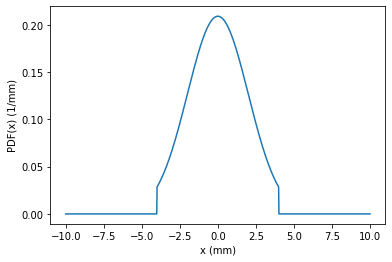

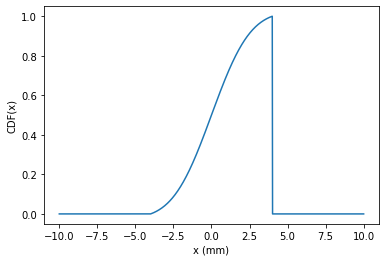

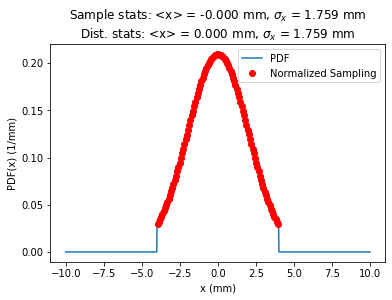

In [5]:
from distgen.dist import Norm
var = 'x'
verbose=1
params={'sigma_x':2*unit_registry('mm'),'avg_x':0*unit_registry('mm'), 'n_sigma_cutoff':2}
norm = Norm(var,verbose=verbose,**params)
norm.plot_pdf()
norm.plot_cdf()
norm.test_sampling()

The distribution can be truncated asymmetrically using the $N_{cutoff,R}$ and $N_{cutoff,L}$ parameters, as shown below.  Note in this case, it is only required that $N_{cutoff,L} < N_{cutoff,R}$, allowing for completley arbtitray location of the truncation points.  This requires a minus sign for the cut off parameters for truncation values less than zero.

Gaussian
      avg_x = 0.000 mm, sigma_x = 2.000 mm
      Left n_sigma_cutoff = 1.000, Right n_sigma_cutoff = -1.500


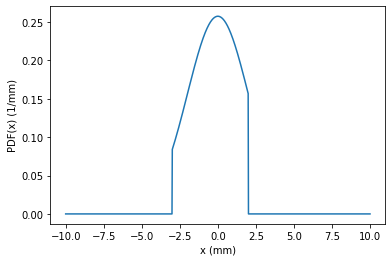

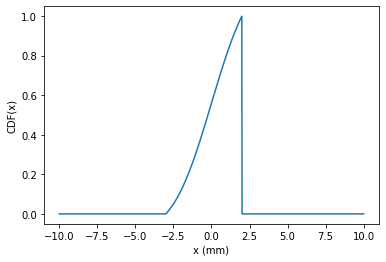

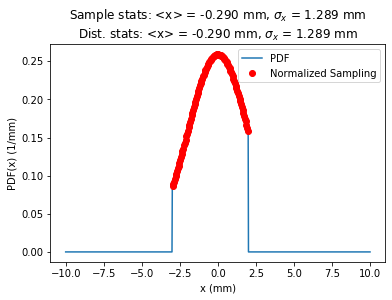

In [6]:
from distgen.dist import Norm
params={'sigma_x':2*unit_registry('mm'),
        'avg_x':0*unit_registry('mm'), 
        'n_sigma_cutoff_left':-1.5,
        'n_sigma_cutoff_right':1}

norm = Norm('x',verbose=1,**params)
norm.plot_pdf()
norm.plot_cdf()
norm.test_sampling()

# 1D PDF from a file

Disgten supports importing a 1D PDF saved in column form in.  The input form of the file should have space separated headers such as $x$ and $Px$, with corresponding column data below it.  The PDF is normalized numerically using the numpy.trapz numerical integration routine. The CDF is computed using the scipy.cumtrapz cumulative numerical intgration routine.

The following example shows a gaussian PDF with cuts added to it.

t-distribution file: '../examples/data/cutgauss.1d.txt'


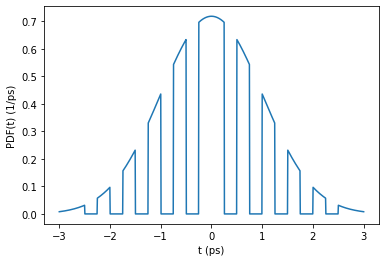

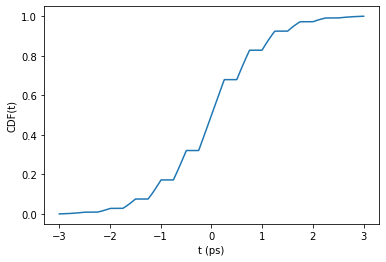

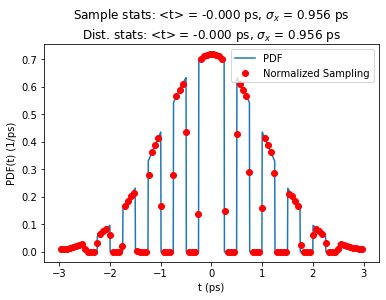

In [7]:
from distgen.dist import File1d
var = 't'
verbose=1
params={'file':'../examples/data/cutgauss.1d.txt','units':'ps'}
file1d = File1d(var,verbose=verbose,**params)
file1d.plot_pdf()
file1d.plot_cdf()
file1d.test_sampling()

# Laser pulse stacking 

crystal temporal laser shaping
      crystal 1 length = 15.096 mm, angle = 0.600 deg
      crystal 2 length = 7.548 mm, angle = 1.800 deg
      crystal 3 length = 3.774 mm, angle = -0.900 deg
      crystal 4 length = 1.887 mm, angle = -0.500 deg
      Pulses propagated: min t = -23.905 ps, max t = 23.905 ps


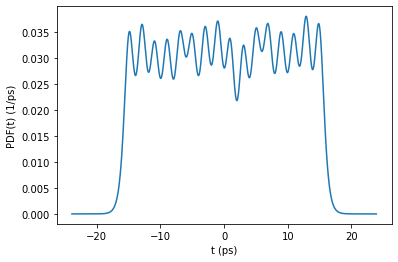

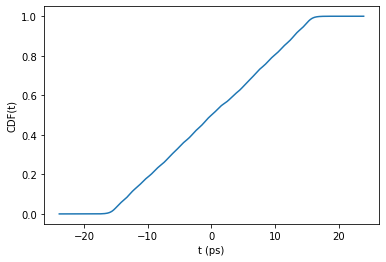

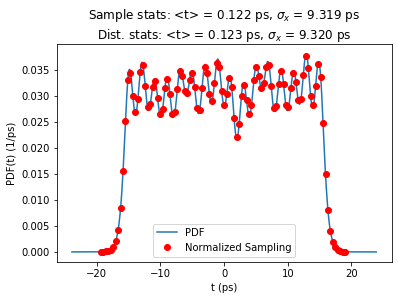

In [8]:
from distgen.dist import TemporalLaserPulseStacking
verbose=1
params={'crystal_length_1': 15.096*unit_registry('mm'),
        'crystal_length_2': 7.548*unit_registry('mm'), 
        'crystal_length_3': 3.774*unit_registry('mm'), 
        'crystal_length_4': 1.887*unit_registry('mm'), 
        'crystal_angle_1':  0.6*unit_registry('deg'), 
        'crystal_angle_2':  1.8*unit_registry('deg'), 
        'crystal_angle_3': -0.9*unit_registry('deg'),  
        'crystal_angle_4': -0.5*unit_registry('deg'), }
    
laser_pulse = TemporalLaserPulseStacking(verbose=verbose,**params)
laser_pulse.plot_pdf()
laser_pulse.plot_cdf()
laser_pulse.test_sampling()

# Tukey 1D

Tukey
      legnth = 2.000 mm, ratio = 0.750


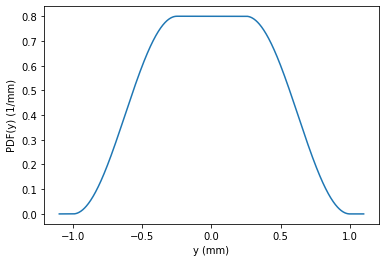

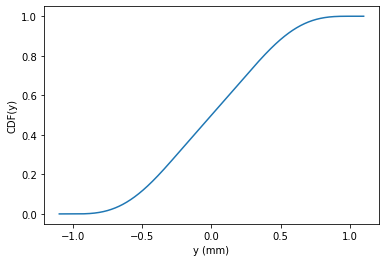

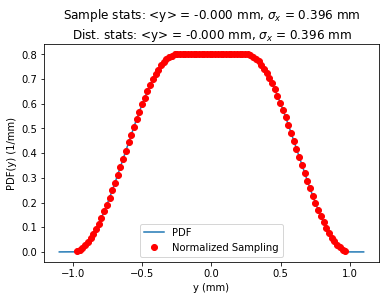

In [9]:
from distgen.dist import Tukey
var = 'y'
verbose=1
params={'length':2*unit_registry('mm'),'ratio':0.75*unit_registry('dimensionless')}
tukey = Tukey(var,verbose=1,**params)
tukey.plot_pdf()
tukey.plot_cdf()
tukey.test_sampling()

# Radial Distributions
-------

Below describes the currently supported radial distributions.  Note that 'normalized histogram' here means histogramming the $r$ coordinates of a sampling and dividing by $r$ in order to compare the original distribution function $2\pi\rho(r)$.  This may cause histogram points near $r=0$ to being to diverge.

# Uniform Radial 

The uniform radial distribution is defined by a distribution function given by

$2\pi\rho(r) = \frac{2}{r_R^2 - r_L^2} $ for $r_L \leq r \leq r_R$, zero everywhere else.

The corresponding CDF is:

$P(r) = \frac{r^2-r_L^2}{r_R^2 - r_L^2}$ for $r_L \leq r \leq r_R$, zero everywhere else.

The corresponding first and second moments are:

$\langle r\rangle = \frac{2}{3}\frac{r_R^3-r_L^3}{r_R^2-r_L^2}$ and $r_{rms}= \sqrt{\frac{1}{2}\left(r_R^2 + r_L^2\right)}$

radial uniform
      min_r = 1.000 mm, max_r = 2.000 mm


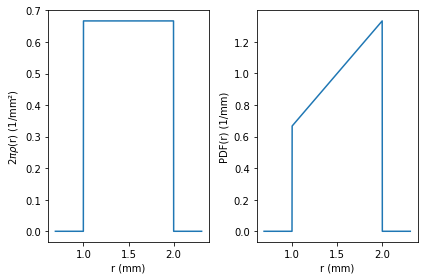

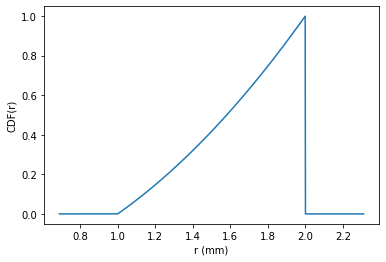

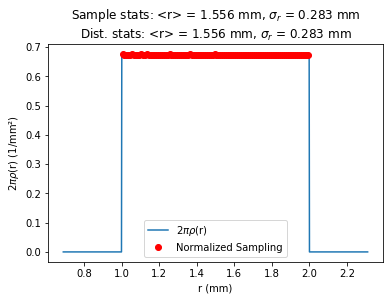

In [10]:
from distgen.dist import UniformRad
verbose=1
params={'min_r':1*unit_registry('mm'),'max_r':2*unit_registry('mm')}
urad = UniformRad(verbose=1,**params)
urad.plot_pdf()
urad.plot_cdf()
urad.test_sampling()

# Radial Normal Distribution (with truncation)

The radial normal distribution including truncation(s) has a probability function given by

$2\pi\rho(r) = \frac{1}{\sigma^2}\frac{\phi(r/\sigma)}{\phi\left(\frac{r_L}{\sigma}\right)-\phi\left(\frac{r_R}{\sigma}\right)} $ for $0 \leq r_L \leq r \leq r_R$ and zero everywhere else.

In this expresion $\phi(\xi) = \frac{1}{2\pi}\exp\left(-\xi^2/2\right)$ is the canonical raidial normal distirbution (no truncation), and the scale parameter $\sigma$ follows from the product of two normal distributions in $x$ and $y$ when $\sigma=\sigma_x=\sigma_y$.  The corresponding CDF is given by

$P(r)= \frac{\phi\left(\frac{r_L}{\sigma}\right)-\phi\left(\frac{r}{\sigma}\right)}{\phi\left(\frac{r_L}{\sigma}\right)-\phi\left(\frac{r_R}{\sigma}\right)} $ for $0 \leq r_L \leq r$.

The corresponding first and second moments are:

$\langle r\rangle = \frac{\frac{r_L}{\sigma}\phi\left(\frac{r_L}{\sigma}\right)
-\frac{r_R}{\sigma}\phi\left(\frac{r_R}{\sigma}\right)
+\frac{1}{2\sqrt{2\pi}}\left( erf\left(\frac{r_R}{\sigma\sqrt{2}}\right) - erf\left(\frac{r_L}{\sigma\sqrt{2}}\right) \right) 
}
{\phi\left(\frac{r_L}{\sigma}\right)-\phi\left(\frac{r_R}{\sigma}\right)}$,

$r_{rms} = \sqrt{ 2\sigma^2 + r_L^2 - \frac{(r_R^2-r_L^2)\phi(r_R/\sigma)}{\phi\left(\frac{r_L}{\sigma}\right)-\phi\left(\frac{r_R}{\sigma}\right)} }$.

Note that in the limits $r_L\rightarrow 0$ and $r_R -> \infty$ the above expressions reduce to the underlying radial normal distribution:

$2\pi\rho(r)\rightarrow \frac{\phi\left(\frac{r}{\sigma}\right)}{\sigma^2}$, $P(r)\rightarrow 1 - \phi\left(\frac{r}{\sigma}\right)$, $\langle r\rangle\rightarrow \sqrt{\frac{\pi}{2}}\sigma$, and $r_{rms}\rightarrow \sqrt{2}\sigma$.  This limiting case is shown first below.


/Users/colwyngulliford/anaconda3/envs/distgen/lib/python3.6/site-packages/pint/quantity.py:1130: RuntimeWarning: invalid value encountered in true_divide
  magnitude = magnitude_op(new_self._magnitude, other._magnitude)


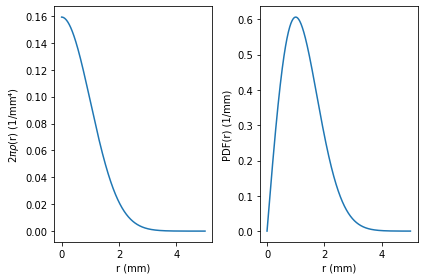

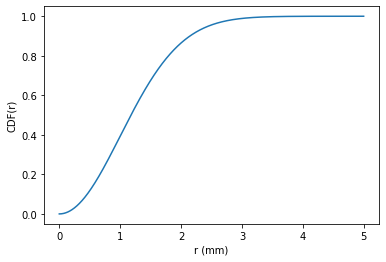

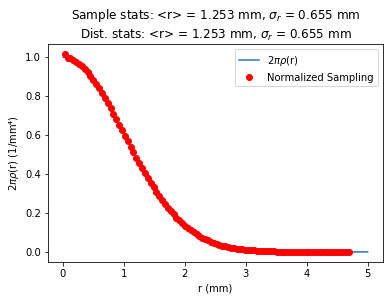

In [11]:
from distgen.dist import NormRad
verbose=1
params={'sigma_xy':1*unit_registry('mm')}
nrad = NormRad(verbose=1,**params)
nrad.plot_pdf()
nrad.plot_cdf()
nrad.test_sampling()

For laser scientists it can be convenient to to work with a pinhole radius and a fraction of the laser intensity to clip a transverse normal laser mode at.  In this case the user can supply a truncation radius ($=r_R$) and a truncation fraction $f = \exp\left(-\frac{r_R^2}{2\sigma}\right)$ from which distgen determines the underlying $\sigma$.  The example below demonstrates this usage:

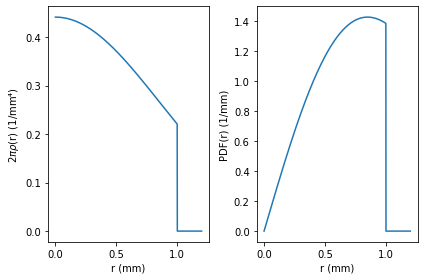

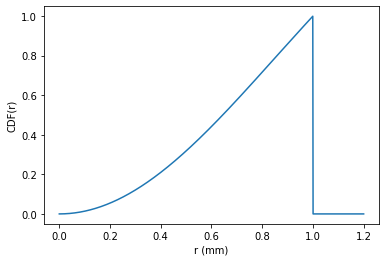

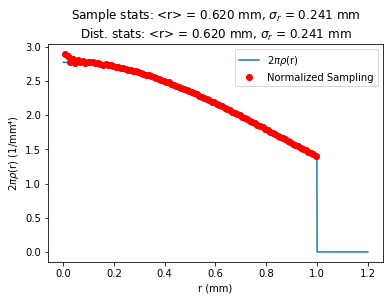

In [12]:
from distgen.dist import NormRad
verbose=1
params={'truncation_radius':1*unit_registry('mm'),'truncation_fraction':0.5*unit_registry('dimensionless')}
nrad = NormRad(verbose=1,**params)
nrad.plot_pdf()
nrad.plot_cdf()
nrad.test_sampling()

TukeyRad
      legnth = 1.000 mm, ratio = 0.750


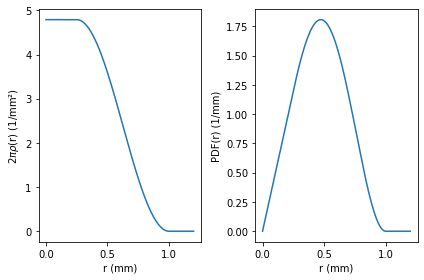

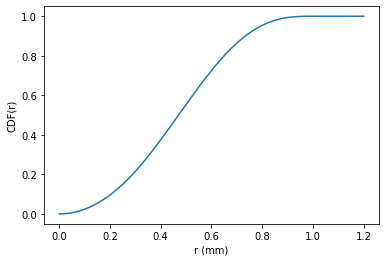

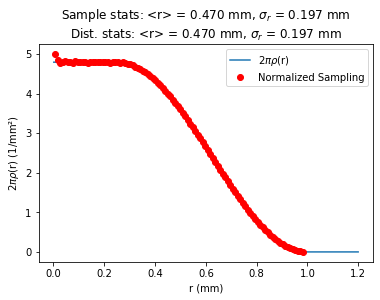

In [13]:
from distgen.dist import TukeyRad
verbose=1
params={'length':1*unit_registry('mm'),'ratio':0.75*unit_registry('dimensionless')}
rtukey = TukeyRad(verbose=1,**params)
rtukey.plot_pdf()
rtukey.plot_cdf()
rtukey.test_sampling()